In [5]:
# Import req. libraries

import pandas as pd
import numpy as np
import nltk
import re

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
train_path = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/train.csv',encoding='ISO-8859-1')
test_path = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/test.csv',encoding='ISO-8859-1')

In [7]:
train_path.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [8]:
test_path.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [9]:
train_path.shape, test_path.shape

((27481, 10), (4815, 9))

In [10]:
ps = PorterStemmer()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [12]:
train_path = train_path.dropna(subset=['text'])

In [13]:
data = []  # list
for i in range(0, min(27480, len(train_path))):
    review = train_path['text'].iloc[i]  # using iloc to access rows by integer position
    review = re.sub('[^a-zA-Z]', ' ', review)  # removing special characters
    review = review.lower()
    review = review.split()
    review = [ps.stem(w) for w in review if w not in set(stopwords.words('english'))]  # stemming & removing stopwords
    review = ' '.join(review)  # joining words
    data.append(review)  # for saving the iteration(preprocess data)

data

['respond go',
 'sooo sad miss san diego',
 'boss bulli',
 'interview leav alon',
 'son put releas alreadi bought',
 'http www dothebounci com smf shameless plug best ranger forum earth',
 'feed babi fun smile coo',
 'soooo high',
 '',
 'journey wow u becam cooler hehe possibl',
 'much love hope reckon chanc minim p never gonna get cake stuff',
 'realli realli like song love stori taylor swift',
 'sharpi run danger low ink',
 'want go music tonight lost voic',
 'test test lg env',
 'uh oh sunburn',
 'ok tri plot altern speak sigh',
 'sick past day thu hair look wierd didnt hat would look http tinyurl com mnf kw',
 'back home gonna miss everi one',
 'he',
 'oh marli sorri hope find soon',
 'play ghost onlin realli interest new updat kirin pet metamorph third job wait dragon pet',
 'clean hous famili com later today',
 'gotta restart comput thought win suppos put end constant rebooti',
 'see wat mean bout foll w friiday call lose f llower friday smh',
 'free fillin app ipod fun im addict

In [14]:
# convert to numerical

x = cv.fit_transform(data).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
# convert to numerical

y = cv.fit_transform(train_path['sentiment']).toarray()
y

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]])

In [16]:
# splitting data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state = 42)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model1 = Sequential()
model1.add(Dense(1500,activation ='relu'))
model1.add(Dense(3000,activation ='relu'))
model1.add(Dense(3,activation ='softmax'))

In [19]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model1.fit(X_train, y_train, epochs=5)

Epoch 1/5
602/602 [==============================] - 220s 365ms/step - loss: 0.0185 - accuracy: 0.9936
Epoch 2/5
602/602 [==============================] - 227s 378ms/step - loss: 0.0153 - accuracy: 0.9949
Epoch 3/5
602/602 [==============================] - 226s 375ms/step - loss: 0.0107 - accuracy: 0.9957
Epoch 4/5
602/602 [==============================] - 227s 376ms/step - loss: 0.0091 - accuracy: 0.9961
Epoch 5/5
602/602 [==============================] - 229s 381ms/step - loss: 0.0085 - accuracy: 0.9962


In [28]:
model1.save('sentiments.h5')

In [29]:
# Evaluate the model on the testing set
evaluation = model1.evaluate(X_test, y_test)
print(f'Test Accuracy: {evaluation[1]}')

258/258 [==============================] - 10s 39ms/step - loss: 0.0266 - accuracy: 0.9930
Test Accuracy: 0.9929645657539368


In [30]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1500)              29334000  
                                                                 
 dense_1 (Dense)             (None, 3000)              4503000   
                                                                 
 dense_2 (Dense)             (None, 3)                 9003      
                                                                 
Total params: 33846003 (129.11 MB)
Trainable params: 33846003 (129.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


258/258 [==============================] - 11s 41ms/step


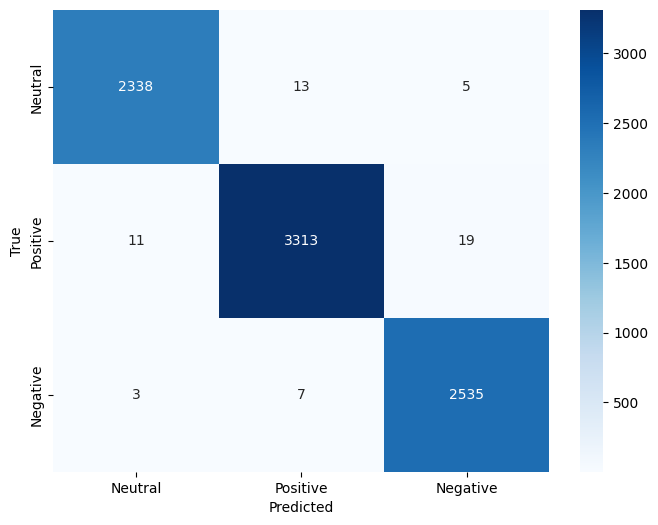

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [32]:
# Function for predicting sentiment
def predict_sentiment(new_review, cv_transformer):
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    
    # Use the transformer fitted on the training data
    new_X_test = cv_transformer.transform([new_review]).toarray()

    # Assuming your model is already trained and loaded as model1
    new_y_pred = model1.predict(new_X_test)

    return new_y_pred



In [33]:
cv_transformer = cv.fit(data)

**Testing**

Testing 1

In [59]:
new_review_text = input("Enter the text... ")
new_review_prediction = predict_sentiment(new_review_text, cv_transformer)

predicted_class = np.argmax(new_review_prediction)

sentiment_labels = ['Negative', 'Neutral','Positive']
predicted_sentiment = sentiment_labels[predicted_class]

print(f'The predicted sentiment is: {predicted_sentiment}')

Enter the text...  i like going to school


1/1 [==============================] - 0s 44ms/step
The predicted sentiment is: Neutral


Testing 2

In [60]:
new_review_text = input("Enter the text... ")
new_review_prediction = predict_sentiment(new_review_text, cv_transformer)

predicted_class = np.argmax(new_review_prediction)

sentiment_labels = ['Neutral', 'Negative','Positive']
predicted_sentiment = sentiment_labels[predicted_class]

print(f'The predicted sentiment is: {predicted_sentiment}')

Enter the text...  good morning


1/1 [==============================] - 0s 39ms/step
The predicted sentiment is: Positive


Testing 3

In [70]:
new_review_text = input("Enter the text... ")
new_review_prediction = predict_sentiment(new_review_text, cv_transformer)

predicted_class = np.argmax(new_review_prediction)

sentiment_labels = ['Neutral', 'Negative','Positive']
predicted_sentiment = sentiment_labels[predicted_class]

print(f'The predicted sentiment is: {predicted_sentiment}')

Enter the text...  don't force


1/1 [==============================] - 0s 41ms/step
The predicted sentiment is: Negative
